# IPL Win Prediction

### Importing The Dataset

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
matches=pd.read_csv("matches.csv")

In [2]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [3]:
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])

city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


### Data Visualization

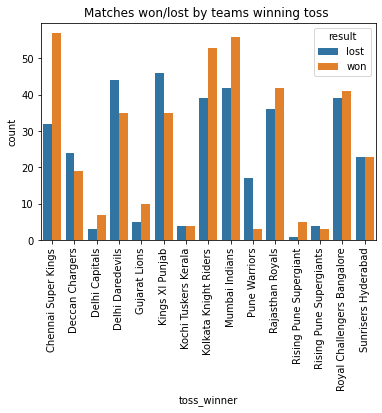

In [4]:
#Toss affecting the win dataframe
toss_win_result = matches.groupby(['toss_winner']).winner.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.winner==toss_win_result.toss_winner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['toss_winner','result'])['count'].sum().reset_index()
#Visualization
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_win_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_win_result_df['toss_winner'].unique(),rotation=90)
plt.show()

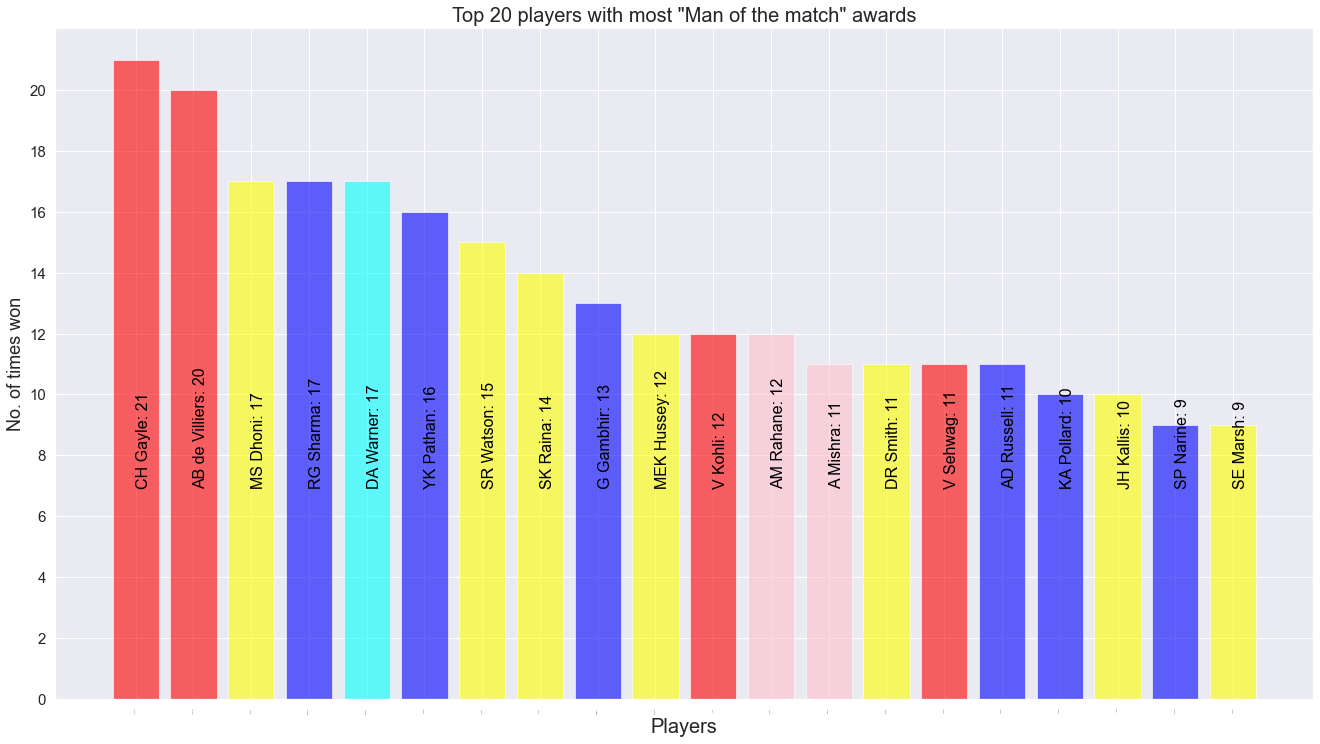

In [30]:
players=pd.DataFrame(matches['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['red','red','yellow','blue','cyan','blue',
               'yellow','yellow','blue','yellow','red','pink',
               'pink','yellow','red','blue','blue','yellow',
               'blue','yellow'],alpha=0.6)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=16)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

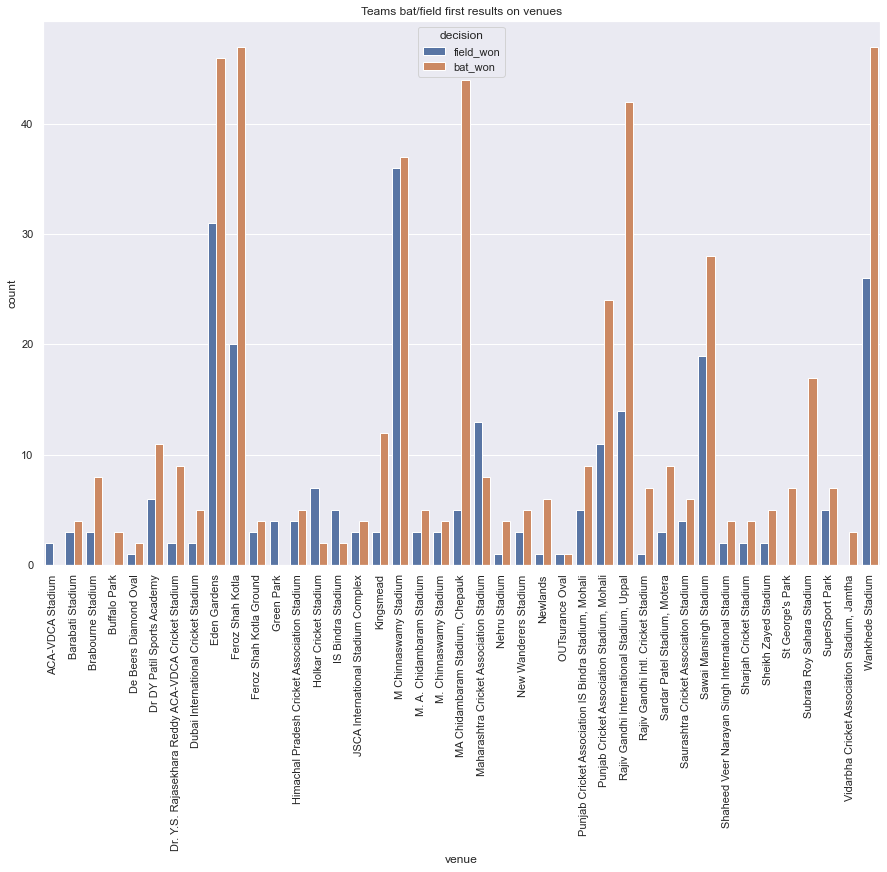

In [8]:
#Winning stats of teams bat/field first by venues
venue_toss_decision_result=matches.loc[:,["toss_winner","toss_decision","winner","venue"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue"]).decision.value_counts().reset_index(name="count")
#Visualization
sns.set(rc={'figure.figsize':(15,10)})
plot = sns.barplot(x="venue", y="count", hue="decision", data=venue_result)
plot.set_title('Teams bat/field first results on venues')
plot.set_xticklabels(venue_result['venue'].unique(),rotation=90)
plt.show()

Text(0.5, 1.0, 'No of matches won by different teams')

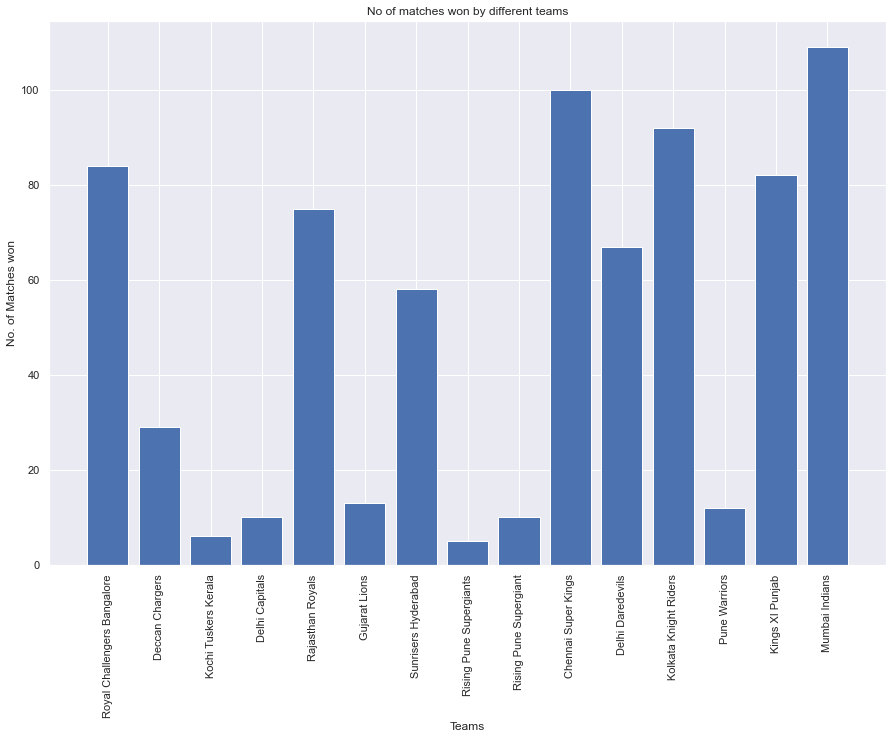

In [9]:
teams = list(set(matches.loc[:,'team1']))
matches_won = [len(matches.loc[matches['winner'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')

<AxesSubplot:>

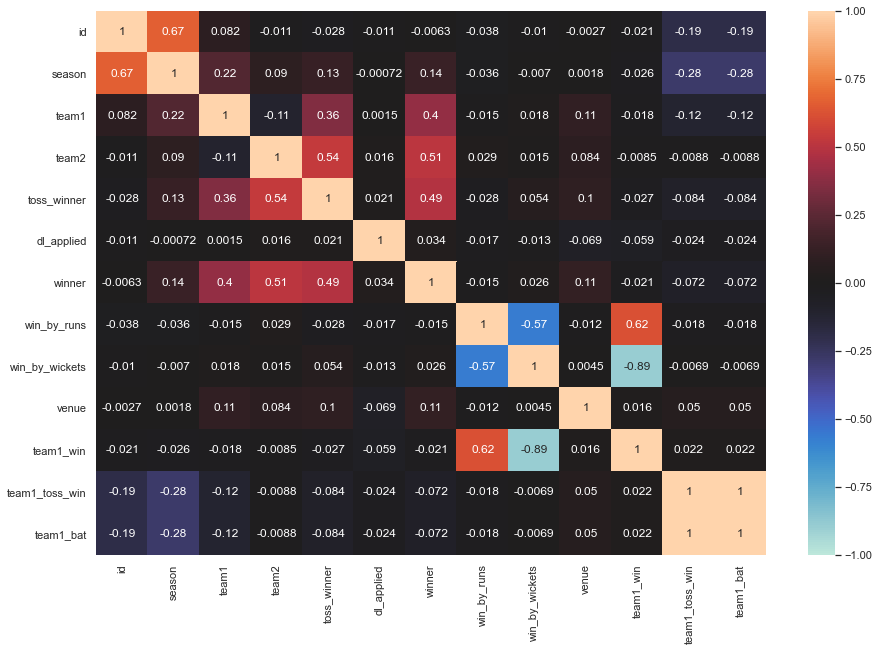

In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.heatmap(matches.corr(), annot=True, vmin=-1,vmax=1,center=0)

### Preprocessing

In [10]:
#Filling the values of city based on venue
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

#Removing records having null values in "winner" column
matches=matches[matches["winner"].notna()]

In [11]:
for team in matches['team1'].unique():
    print(team)

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiant
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants
Delhi Capitals


In [12]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [13]:
#encoding the numeric values
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

In [14]:
#outcome variable team1_win as a probability of team1 winning the match
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1#dataframe of related features
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,12,3,1.0,1.0,17
...,...,...,...,...,...
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
753,13,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [12]:
#dataframe of related features
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,12,3,1.0,1.0,17
...,...,...,...,...,...
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
753,13,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [13]:
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.108116,-0.116832,-0.116832,0.108240
team2,-0.108116,1.000000,-0.008782,-0.008782,0.084187
team1_toss_win,-0.116832,-0.008782,1.000000,1.000000,0.050049
team1_bat,-0.116832,-0.008782,1.000000,1.000000,0.050049
venue,0.108240,0.084187,0.050049,0.050049,1.000000


In [14]:
#we see that team1_bat==team1_toss_win ...
#that is because of the dataset as the team who choses to bat after winning the toss was chosen as team1

In [33]:
#feature selection 
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg,n_features_to_select=5)
rfe = rfe.fit(X, target.values.ravel())
#Checking for the features of they are important
print(rfe.support_)

[ True  True  True  True  True]


In [34]:
#Splitting the data into training and testing data and scaling it
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,zero_division=0))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[93  2]
 [56  0]]
              precision    recall  f1-score   support

           0       0.62      0.98      0.76        95
           1       0.00      0.00      0.00        56

    accuracy                           0.62       151
   macro avg       0.31      0.49      0.38       151
weighted avg       0.39      0.62      0.48       151

Accuracy of logistic regression classifier on test set: 0.6159


In [36]:
#SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

[[93  2]
 [49  7]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78        95
           1       0.78      0.12      0.22        56

    accuracy                           0.66       151
   macro avg       0.72      0.55      0.50       151
weighted avg       0.70      0.66      0.57       151

Accuracy of SVM classifier on test set: 0.6623


In [37]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[63 32]
 [25 31]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        95
           1       0.49      0.55      0.52        56

    accuracy                           0.62       151
   macro avg       0.60      0.61      0.60       151
weighted avg       0.63      0.62      0.63       151

Accuracy of decision tree classifier on test set: 0.6225


In [38]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Confusion matrix
 [[61 34]
 [29 27]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        95
           1       0.44      0.48      0.46        56

    accuracy                           0.58       151
   macro avg       0.56      0.56      0.56       151
weighted avg       0.59      0.58      0.59       151

Accuracy of random forest classifier on test set: 0.5828
